# 이진분류 평가모델

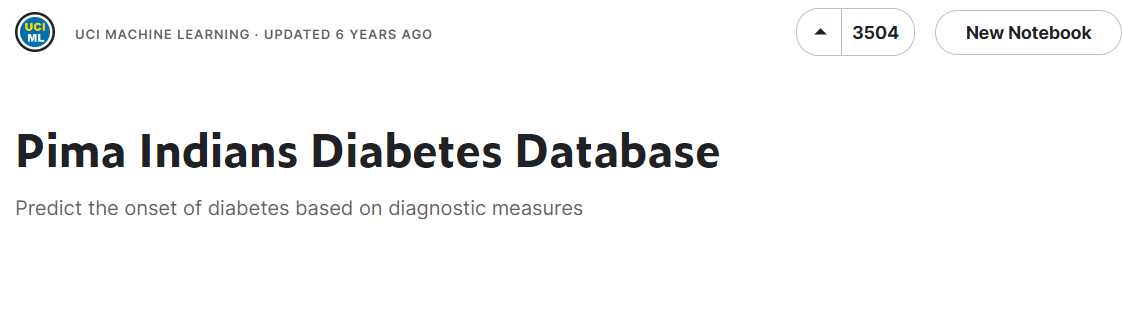

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, KFold, StratifiedKFold, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

from sklearn.ensemble     import RandomForestRegressor,RandomForestClassifier
from sklearn.tree         import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# ---- 추가 모델
from sklearn.ensemble     import AdaBoostRegressor, VotingRegressor
from xgboost              import XGBRegressor
from lightgbm             import LGBMRegressor



In [3]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn. metrics import f1_score
from sklearn. metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [10]:
df = pd.read_csv('./datasets/diabetes.csv')
df.rename(columns = {'Outcome':'target'},inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
y = df['Outcome']
X = df.drop(['Outcome'], axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify = y, random_state = 111)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=111)
model = RandomForestClassifier(random_state=111) 



score_list = cross_val_score(model, X, y, scoring='accuracy' , cv=kf)

print( X_train.shape, y_train.shape )
print( score_list )
print(f" {np.mean(score_list):.4f} " )

(614, 8) (614,)
[0.72077922 0.77272727 0.80519481 0.70588235 0.79084967]
 0.7591 


In [7]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"accuracy : {accuracy:.5f}")

accuracy : 0.79221
